In [1]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')
feature = pd.read_csv('/content/sample_data/features.csv')
store = pd.read_csv('/content/sample_data/stores.csv')

In [5]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [6]:
store.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [7]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [8]:
train = train.merge(feature).merge(store)
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


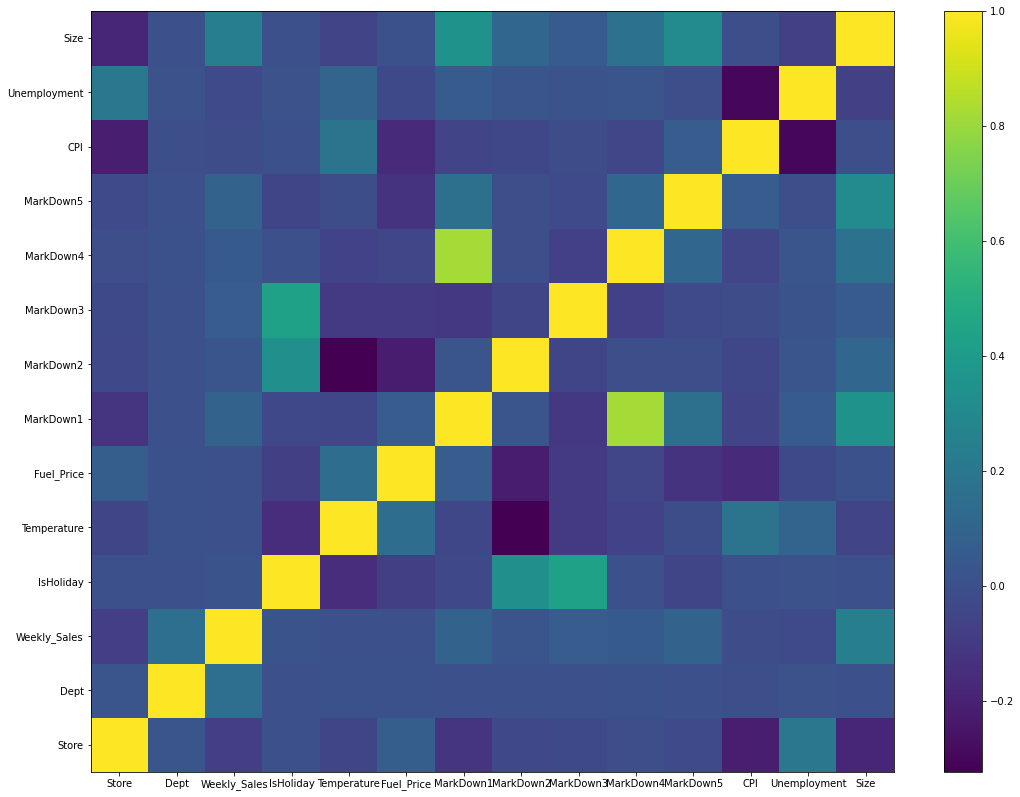

In [10]:
import matplotlib.pyplot as plt

plot = plt.figure(figsize=(18, 14))
corr = train.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plot.colorbar(c)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


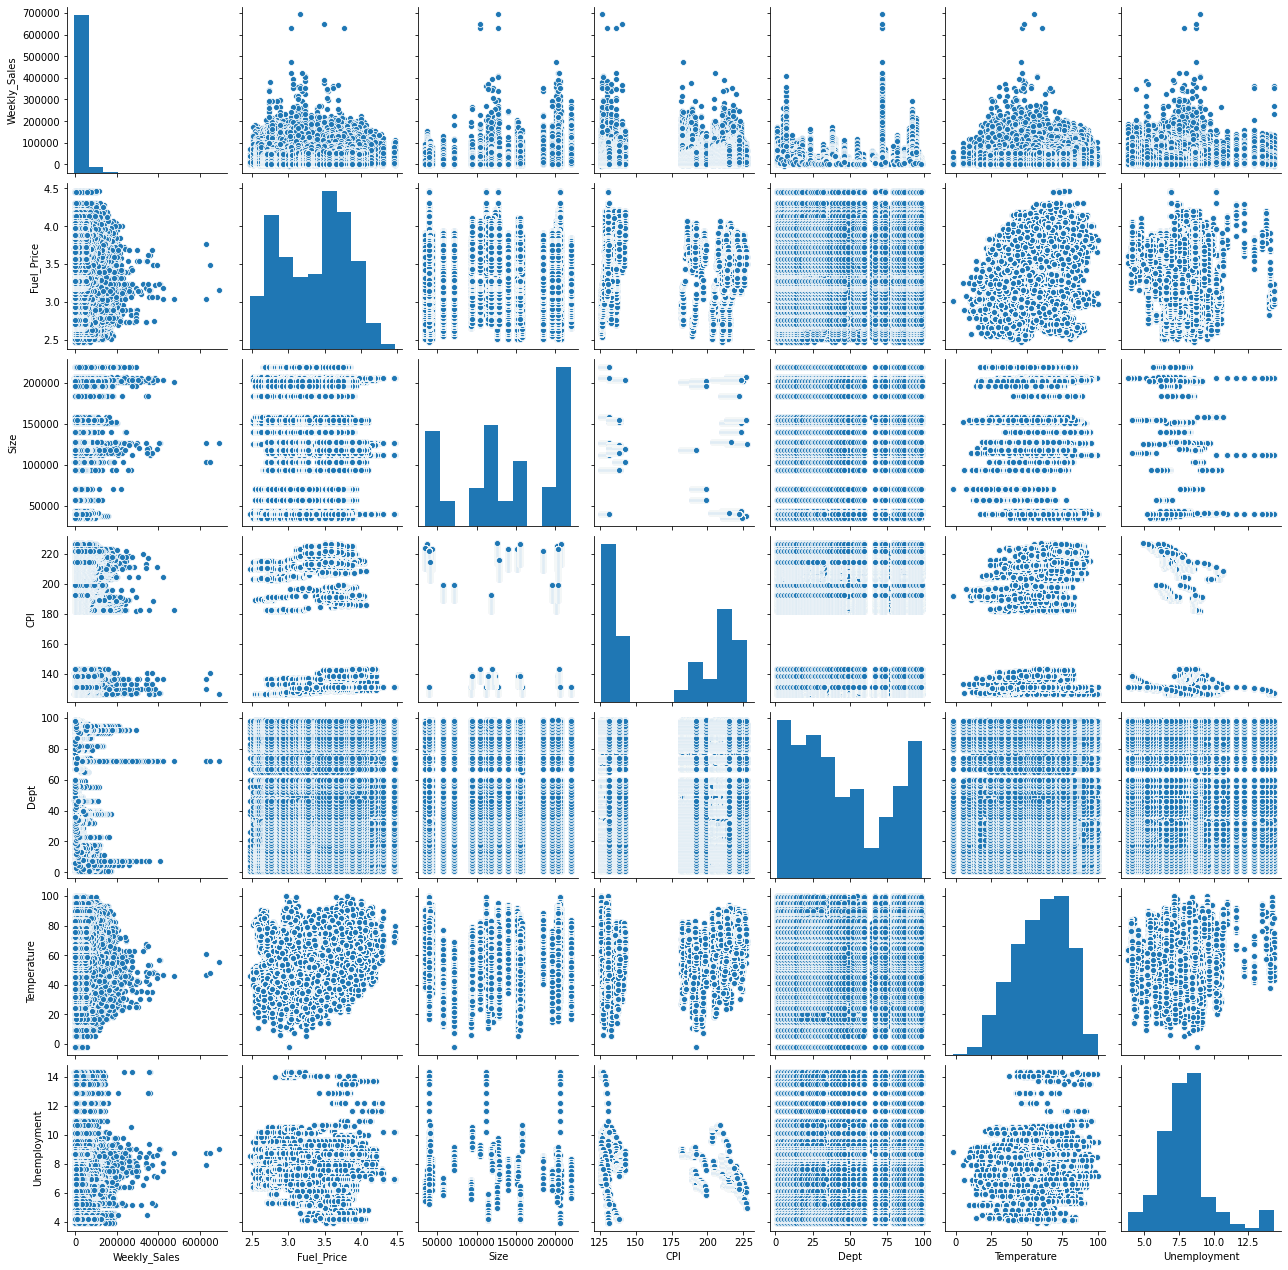

In [12]:
import seaborn as sns

sns.pairplot(train, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

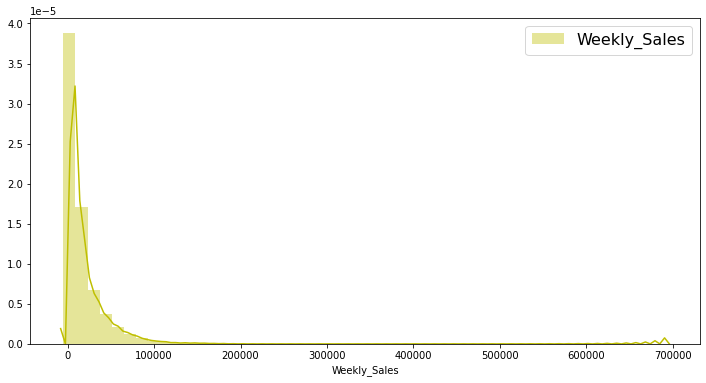

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(train['Weekly_Sales'], color='y')
plt.legend(['Weekly_Sales'], loc='best', fontsize=16)
plt.show()

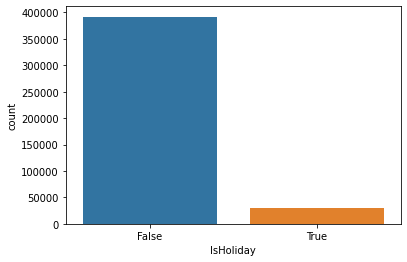

In [71]:
sns.countplot(train['IsHoliday'])


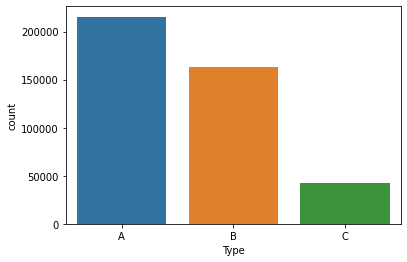

In [29]:
sns.countplot(train['Type'])

In [30]:
corr_matrix = train.corr()
corr_df = corr_matrix['Weekly_Sales'].sort_values(ascending = False)
corr_df

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [31]:
type = pd.get_dummies(train['Type'], prefix = 'Type')
type.head(2)

,Type_A,Type_B,Type_C
0,1,0,0
1,1,0,0


In [32]:
train = pd.concat([train, type], axis=1)
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,1,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,1,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,1,0,0


In [33]:
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [35]:
train.drop('Date', axis=1, inplace=True)

In [36]:
train.drop('Type', axis=1, inplace=True)

In [37]:

train.isna().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Size                 0
Type_A               0
Type_B               0
Type_C               0
Day                  0
Month                0
Year                 0
dtype: int64

In [38]:
train.fillna(value=0, inplace=True)

In [39]:
train.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Type_A          0
Type_B          0
Type_C          0
Day             0
Month           0
Year            0
dtype: int64

In [40]:
corr_matrix = train.corr()
corr_df = corr_matrix['Weekly_Sales'].sort_values(ascending = False)
corr_df

Weekly_Sales    1.000000
Size            0.243828
Type_A          0.185417
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
Month           0.028409
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Day            -0.006187
Year           -0.010111
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Type_C         -0.095388
Type_B         -0.131219
Name: Weekly_Sales, dtype: float64

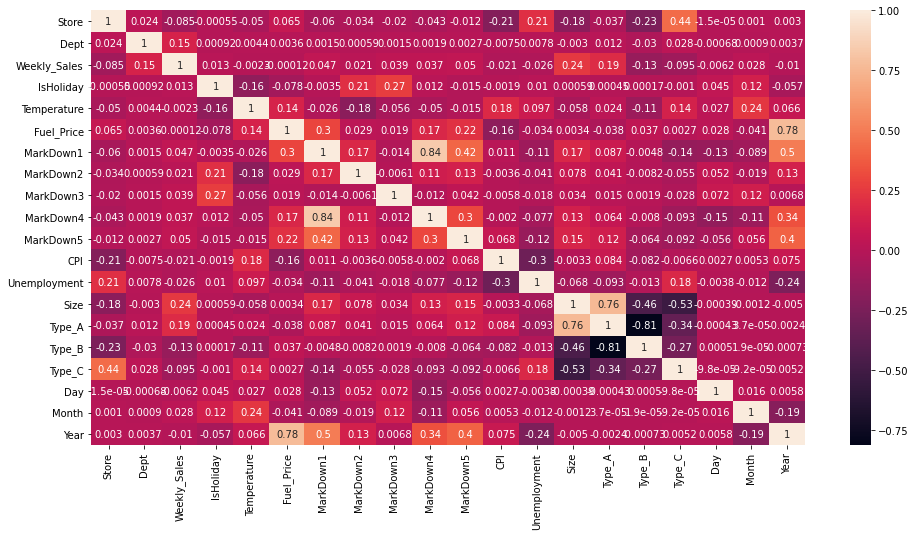

In [41]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [42]:
train.drop(['Unemployment','Fuel_Price'], axis=1, inplace=True)


In [43]:
x= train.drop('Weekly_Sales', axis=1).values

In [44]:
y = train['Weekly_Sales'].values

In [45]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=100)

In [46]:
train_x

array([[8, 16, False, ..., 17, 8, 2012],
       [19, 8, False, ..., 11, 5, 2012],
       [2, 35, False, ..., 23, 3, 2012],
       ...,
       [22, 28, True, ..., 11, 2, 2011],
       [6, 21, False, ..., 20, 1, 2012],
       [31, 37, False, ..., 9, 12, 2011]], dtype=object)

In [47]:
train_y

array([13829.19, 42432.17,  2943.06, ...,  1018.89,  6903.88,  2643.76])

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(train_x, train_y)
pred_linear_y = linear.predict(test_x)

In [50]:
linear_score=linear.score(test_x, test_y)*100
linear_score

9.2026478510302

In [51]:
mse_linear = np.sqrt(mean_squared_error(test_y,pred_linear_y))
mse_linear

21698.51221635614

In [52]:
mae_linear = mean_absolute_error(test_y,pred_linear_y)
mae_linear

14582.233939864498

In [53]:
print('Accuracy Score:',linear_score)
print('Root Mean Square Error: ', mse_linear)
print('Mean Absolute Error: ', mae_linear)

Accuracy Score: 9.2026478510302
Root Mean Square Error:  21698.51221635614
Mean Absolute Error:  14582.233939864498


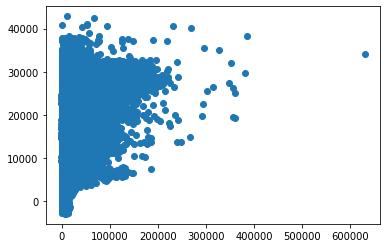

In [54]:
plt.scatter(test_y, pred_linear_y)
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(train_x, train_y)
pred_knn_y = knn.predict(test_x)
score_knn=knn.score(test_x, test_y)
score_knn=score_knn*100

In [56]:
mse_knn = np.sqrt(mean_squared_error(test_y,pred_knn_y))
mse_knn

18665.49577858846

In [57]:
mae_knn = mean_absolute_error(test_y,pred_knn_y)
mae_knn

11449.706773076656

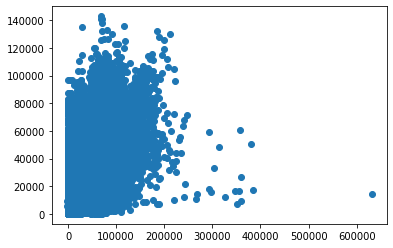

In [58]:
plt.scatter(test_y, pred_knn_y)
plt.show()

In [59]:
print('Accuracy Score:', score_knn)
print('Root Mean Square Error: ', mse_knn)
print('Mean Absolute Error: ', mae_knn)

Accuracy Score: 32.811904720486574
Root Mean Square Error:  18665.49577858846
Mean Absolute Error:  11449.706773076656


In [60]:
from sklearn.ensemble import ExtraTreesRegressor

etg = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
etg.fit(train_x, train_y)
pred_etg_y = etg.predict(test_x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.6s finished


In [61]:
score_etg=etg.score(test_x, test_y)
score_etg=score_etg*100
mse_etg = np.sqrt(mean_squared_error(test_y,pred_etg_y))
mae_etg = mean_absolute_error(test_y,pred_etg_y)
score_etg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.6s finished


97.60116656844471

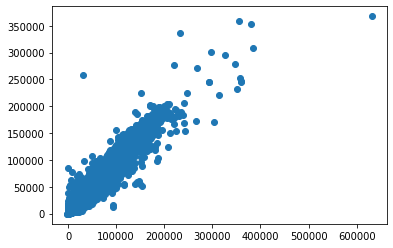

In [62]:
plt.scatter(test_y, pred_etg_y)
plt.show()

In [63]:
print('Accuracy Score:', score_etg)
print('Root Mean Square Error: ', mse_etg)
print('Mean Absolute Error: ', mae_etg)

Accuracy Score: 97.60116656844471
Root Mean Square Error:  3526.9021555678596
Mean Absolute Error:  1410.5960024717128


In [64]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
rfg.fit(train_x, train_y)
pred_rfg_y = rfg.predict(test_x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.2s finished


In [65]:
score_rfg=rfg.score(test_x, test_y)
score_rfg=score_rfg*100
mse_rfg = np.sqrt(mean_squared_error(test_y,pred_rfg_y))
mae_rfg = mean_absolute_error(test_y,pred_rfg_y)
score_rfg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished


76.04005707198634

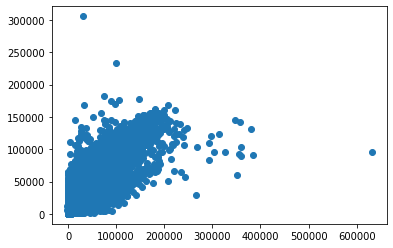

In [66]:
plt.scatter(test_y, pred_rfg_y)
plt.show()

In [67]:
print('Accuracy Score:', score_rfg)
print('Root Mean Square Error: ', mse_rfg)
print('Mean Absolute Error: ', mae_rfg)

Accuracy Score: 76.04005707198634
Root Mean Square Error:  11146.44185084751
Mean Absolute Error:  6682.457558203067


**XGBoost Regressor**

In [72]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=500)
reg.fit(train_x, train_y)
pred_reg_y = reg.predict(test_x)

[05:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
score_reg=reg.score(test_x, test_y)
score_reg=score_reg*100
mse_reg = np.sqrt(mean_squared_error(test_y,pred_reg_y))
mae_reg = mean_absolute_error(test_y,pred_reg_y)

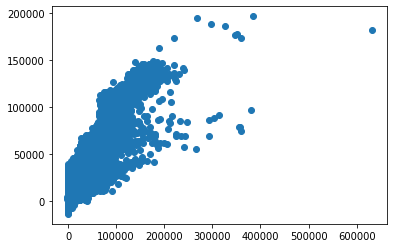

In [74]:
plt.scatter(test_y, pred_reg_y)
plt.show()

In [75]:
print('Accuracy Score:', score_reg)
print('Root Mean Square Error: ', mse_reg)
print('Mean Absolute Error: ', mae_reg)

Accuracy Score: 85.43952364353285
Root Mean Square Error:  8689.227276618012
Mean Absolute Error:  4996.594169271583


In [77]:
!pip install catboost
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()
cbr.fit(train_x, train_y)
pred_cbr_y = cbr.predict(test_x)

     |████████████████████████████████| 64.8MB 136kB/s 
Learning rate set to 0.107413
0:	learn: 21752.9932155	total: 120ms	remaining: 2m
1:	learn: 20945.3836728	total: 179ms	remaining: 1m 29s
2:	learn: 20265.6297166	total: 234ms	remaining: 1m 17s
3:	learn: 19689.1312564	total: 288ms	remaining: 1m 11s
4:	learn: 19221.8283672	total: 351ms	remaining: 1m 9s
5:	learn: 18817.5923735	total: 409ms	remaining: 1m 7s
6:	learn: 18476.0928035	total: 465ms	remaining: 1m 6s
7:	learn: 18132.5352308	total: 522ms	remaining: 1m 4s
8:	learn: 17496.5210385	total: 587ms	remaining: 1m 4s
9:	learn: 17228.2754615	total: 641ms	remaining: 1m 3s
10:	learn: 16709.5923800	total: 715ms	remaining: 1m 4s
11:	learn: 16441.6602344	total: 767ms	remaining: 1m 3s
12:	learn: 16246.4328034	total: 828ms	remaining: 1m 2s
13:	learn: 15853.6262586	total: 889ms	remaining: 1m 2s
14:	learn: 15655.0890846	total: 944ms	remaining: 1m 2s
15:	learn: 15472.0732744	total: 1s	remaining: 1m 1s
16:	learn: 15145.1744455	total: 1.06s	remaining

In [78]:
score_cbr=cbr.score(test_x, test_y)
score_cbr=score_cbr*100
mse_cbr = np.sqrt(mean_squared_error(test_y,pred_reg_y))
mae_cbr = mean_absolute_error(test_y,pred_reg_y)

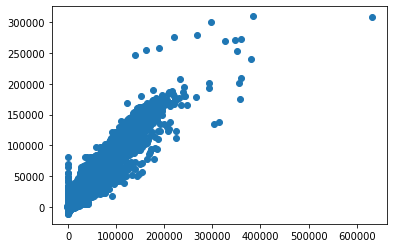

In [79]:
plt.scatter(test_y, pred_cbr_y)
plt.show()

In [80]:
print('Accuracy Score:', score_cbr)
print('Root Mean Square Error: ', mse_cbr)
print('Mean Absolute Error: ', mae_cbr)

Accuracy Score: 94.0692498952825
Root Mean Square Error:  8689.227276618012
Mean Absolute Error:  4996.594169271583


In [81]:
algorithms = ['Linear Regression', 'KNN', 'Extra Tree Regressor', 'Random Forest Regressor', 'XGBoost', 'catBoostRegresor']
rmse = [mse_linear, mse_knn, mse_etg, mse_rfg, mse_reg, mse_cbr]
mae = [mae_linear, mae_knn, mae_etg, mae_rfg, mae_reg, mae_cbr]
score = [linear_score, score_knn, score_etg, score_rfg, score_reg, score_cbr]

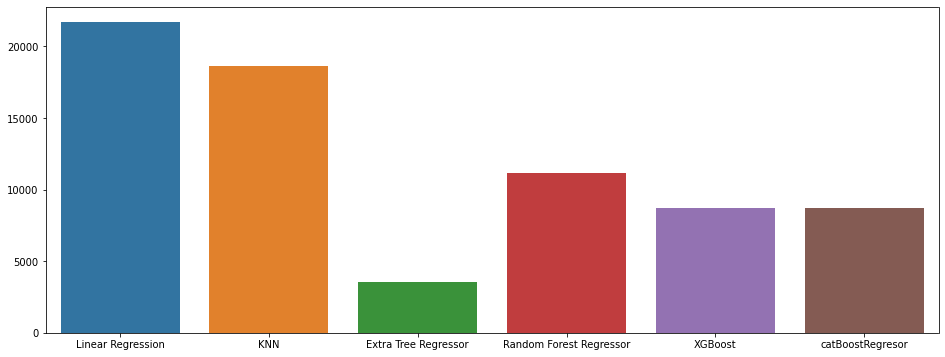

In [82]:
plt.figure(figsize=(16, 6))
sns.barplot(algorithms, rmse)

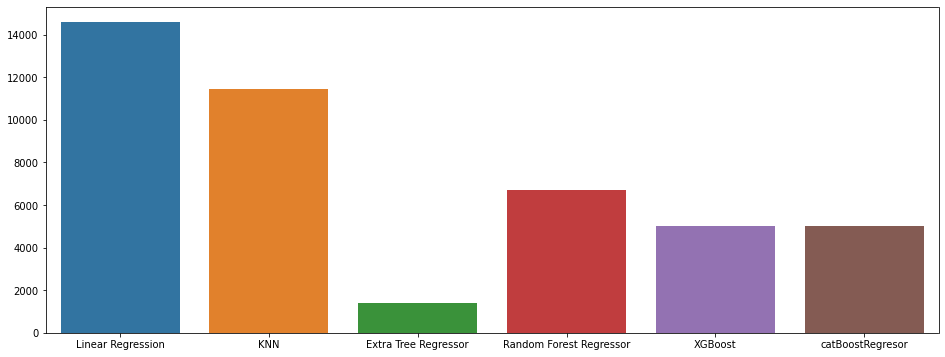

In [83]:
plt.figure(figsize=(16, 6))
sns.barplot(algorithms, mae)

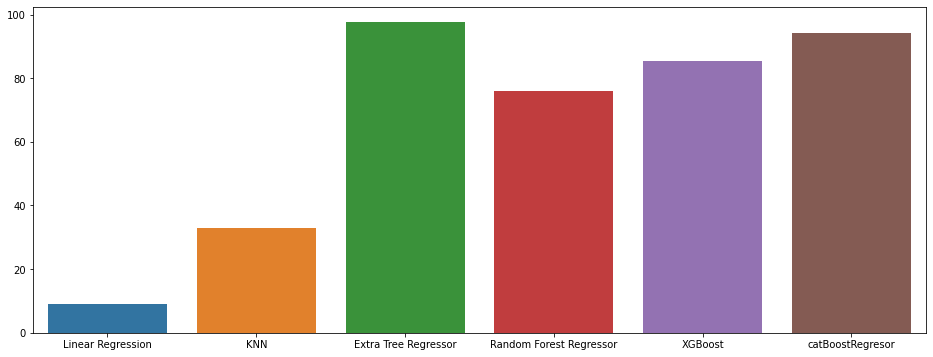

In [84]:
plt.figure(figsize=(16, 6))
sns.barplot(algorithms, score)

In [85]:
test = pd.read_csv('/content/sample_data/test.csv')
test=test.merge(feature, how='left').merge(store, how='left')

In [86]:
type_test = pd.get_dummies(test['Type'], prefix = 'Type')
type_test.head(2)

,Type_A,Type_B,Type_C
0,1,0,0
1,1,0,0


In [87]:
test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
test = test.fillna(0)
column_date =  test['Date']

In [88]:
test['Date'] = pd.to_datetime(test['Date'])
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     115064 non-null  float64       
 7   MarkDown2     115064 non-null  float64       
 8   MarkDown3     115064 non-null  float64       
 9   MarkDown4     115064 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           115064 non-null  float64       
 12  Unemployment  115064 non-null  float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
 15  Day           115

In [90]:
test = pd.concat([test, type_test], axis=1)
test.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Month,Year,Type_A,Type_B,Type_C
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2,11,2012,1,0,0
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,9,11,2012,1,0,0
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,16,11,2012,1,0,0


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     115064 non-null  float64       
 7   MarkDown2     115064 non-null  float64       
 8   MarkDown3     115064 non-null  float64       
 9   MarkDown4     115064 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           115064 non-null  float64       
 12  Unemployment  115064 non-null  float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
 15  Day           115

In [92]:
test.drop('Date', axis=1, inplace=True)

In [93]:
test.drop('Type', axis=1, inplace=True)

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   IsHoliday     115064 non-null  bool   
 3   Temperature   115064 non-null  float64
 4   Fuel_Price    115064 non-null  float64
 5   MarkDown1     115064 non-null  float64
 6   MarkDown2     115064 non-null  float64
 7   MarkDown3     115064 non-null  float64
 8   MarkDown4     115064 non-null  float64
 9   MarkDown5     115064 non-null  float64
 10  CPI           115064 non-null  float64
 11  Unemployment  115064 non-null  float64
 12  Size          115064 non-null  int64  
 13  Day           115064 non-null  int64  
 14  Month         115064 non-null  int64  
 15  Year          115064 non-null  int64  
 16  Type_A        115064 non-null  uint8  
 17  Type_B        115064 non-null  uint8  
 18  Type

In [95]:
test.drop(['Unemployment','Fuel_Price'], axis=1, inplace=True)

In [96]:
prediction = etg.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


In [97]:
test.isna().sum()

Store          0
Dept           0
IsHoliday      0
Temperature    0
MarkDown1      0
MarkDown2      0
MarkDown3      0
MarkDown4      0
MarkDown5      0
CPI            0
Size           0
Day            0
Month          0
Year           0
Type_A         0
Type_B         0
Type_C         0
dtype: int64

In [102]:
prediction = prediction.round(2)
prediction

array([19895.35, 20280.85, 23534.44, ...,  6056.86,  5977.4 ,  6090.16])

In [103]:
test['Weekly_Sales'] = prediction
test['Date'] = column_date
test['id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test['Date'].astype(str)
test = test[['id', 'Weekly_Sales']]
test = test.rename(columns={'id': 'Id', 'Weekly_Sales': 'Weekly_Sales'})

In [104]:
test.to_csv('/content/sample_data/output.csv', index=False)

In [105]:
op = pd.read_csv('/content/sample_data/output.csv')

In [106]:
op.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,19895.35
1,1_1_2012-11-09,20280.85
2,1_1_2012-11-16,23534.44
3,1_1_2012-11-23,31982.29
4,1_1_2012-11-30,23481.57
